# Problem Statement
Based on the Pima Indians Hospital diabetes data , build Machine Learning binary classification model to predict if the person diabetic or Not based on below

Features.
* Pregnancies
* Glucose
* BloodPressure
* SkinThinckness
* Insulin
* BMI
* Diabetespedigreefunction
* Age

Label
* Outcome
  
0 - Normal
1 - Daibetes

Refer SKlearn official Documnetation if you are not sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

In [9]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [10]:
#loading the dataset
data=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.shape

(768, 9)

There are 768 rows and 9 columns

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see there are no null values present.
* But there are values marked as 0. For features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI, where a value of zero may not be realistic or valid.

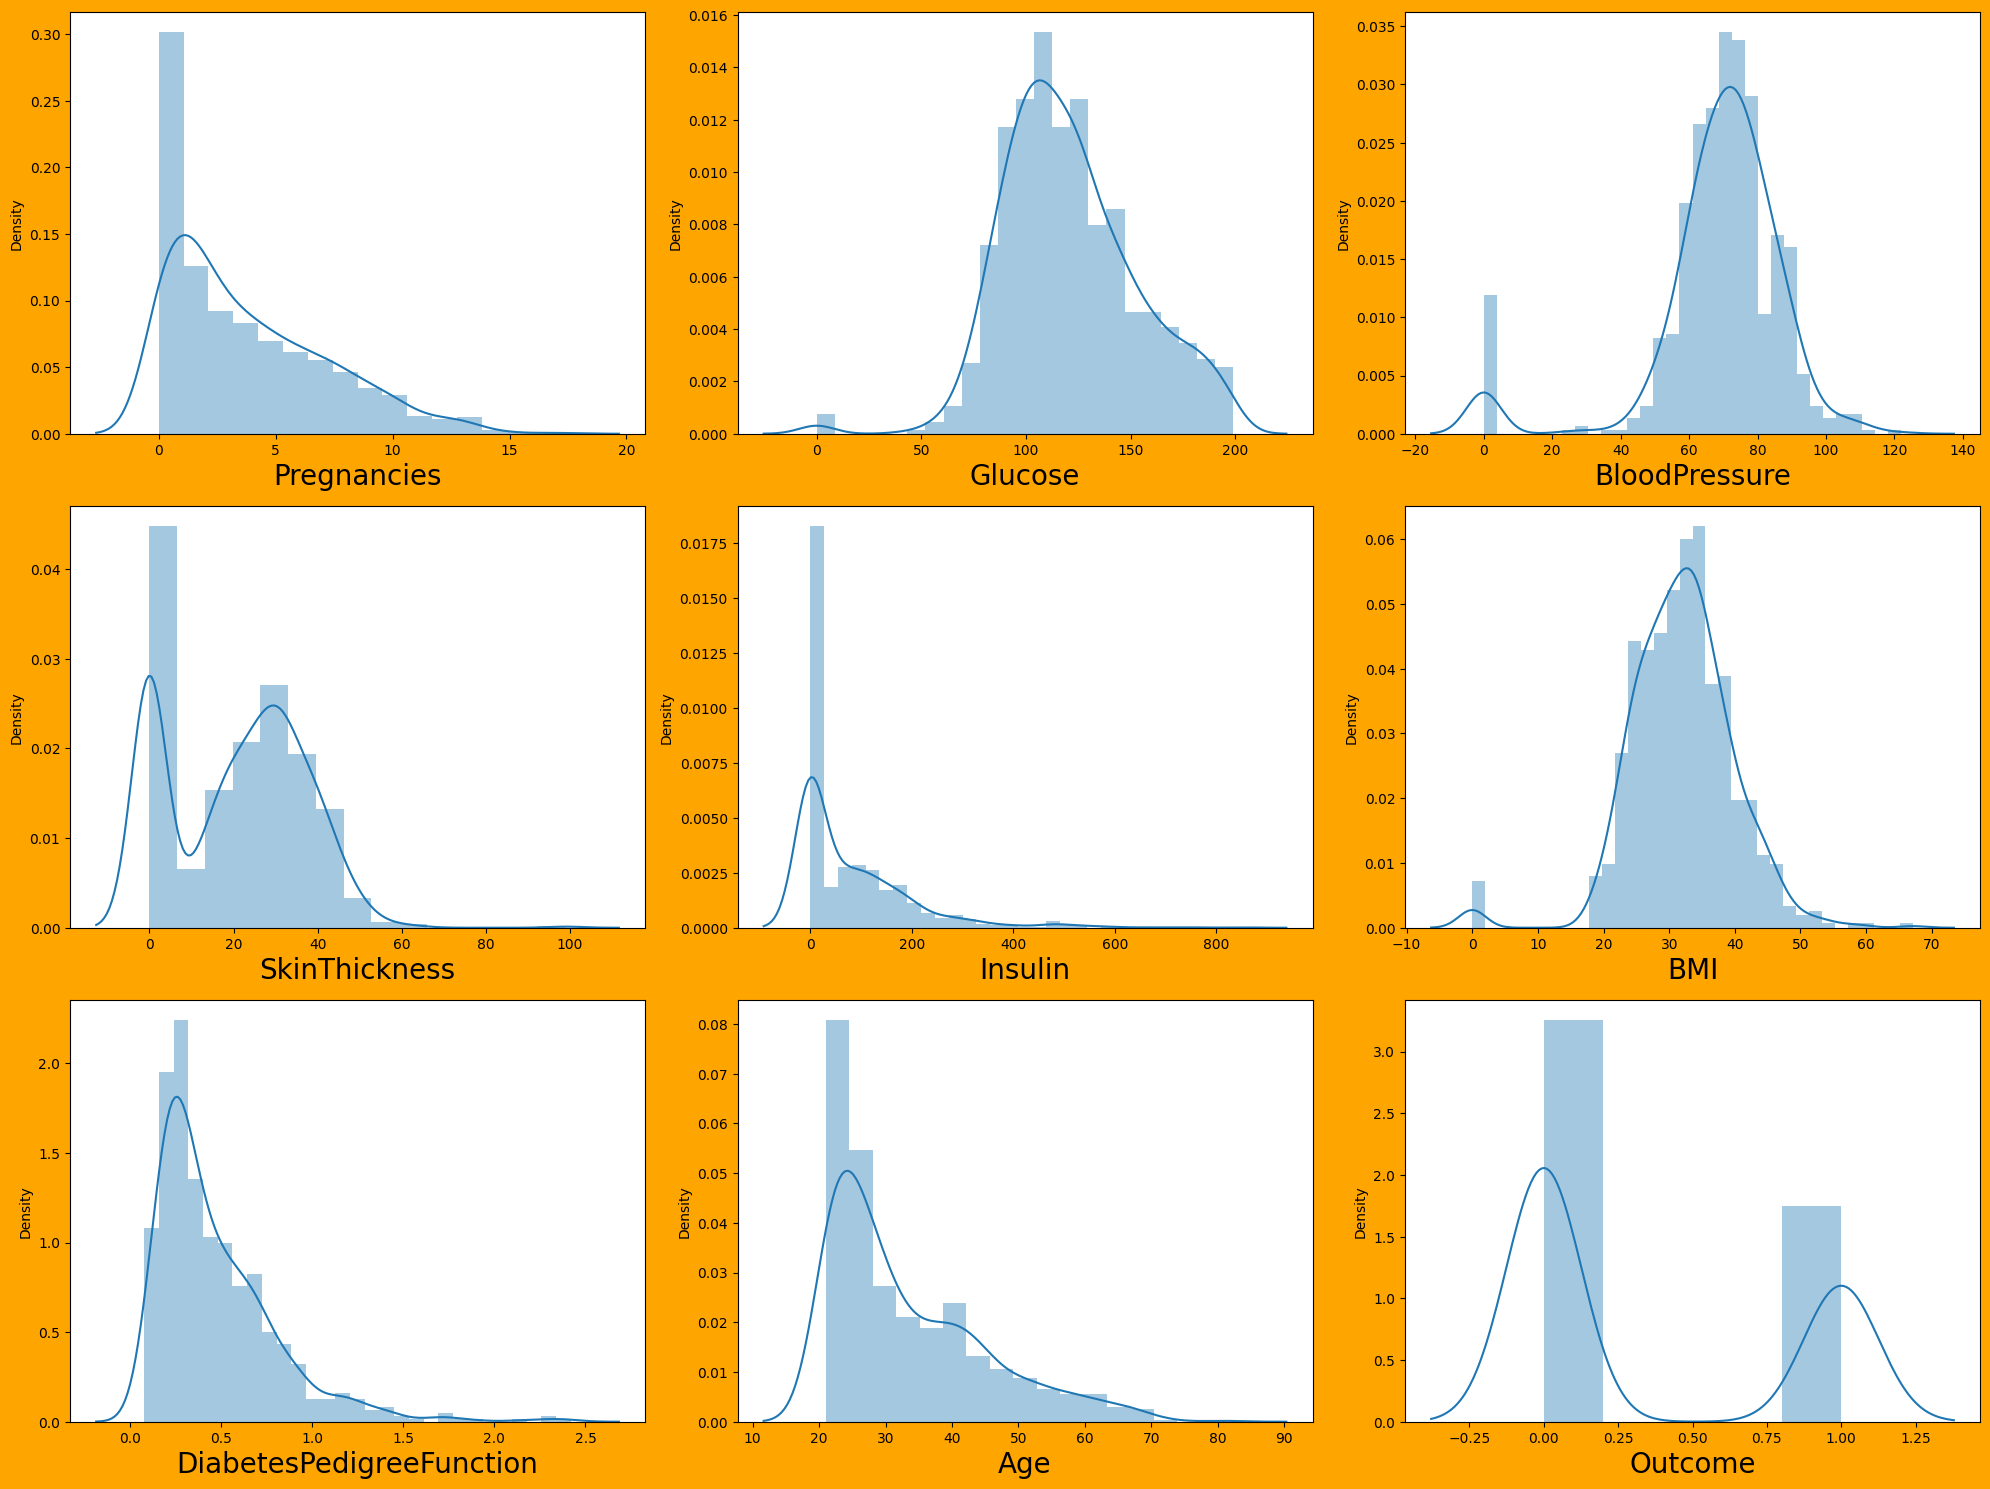

In [14]:
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

There is 0 values in this featur(Glucose	BloodPressure	SkinThickness	Insulin	     BMI)
We have to remove that.

Here we are going to replace zero values in the features (Glucose, BloodPressure, SkinThickness, Insulin, BMI) with their respective median values.

In [16]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [17]:
#Lest Plot Again and see problems in dataset

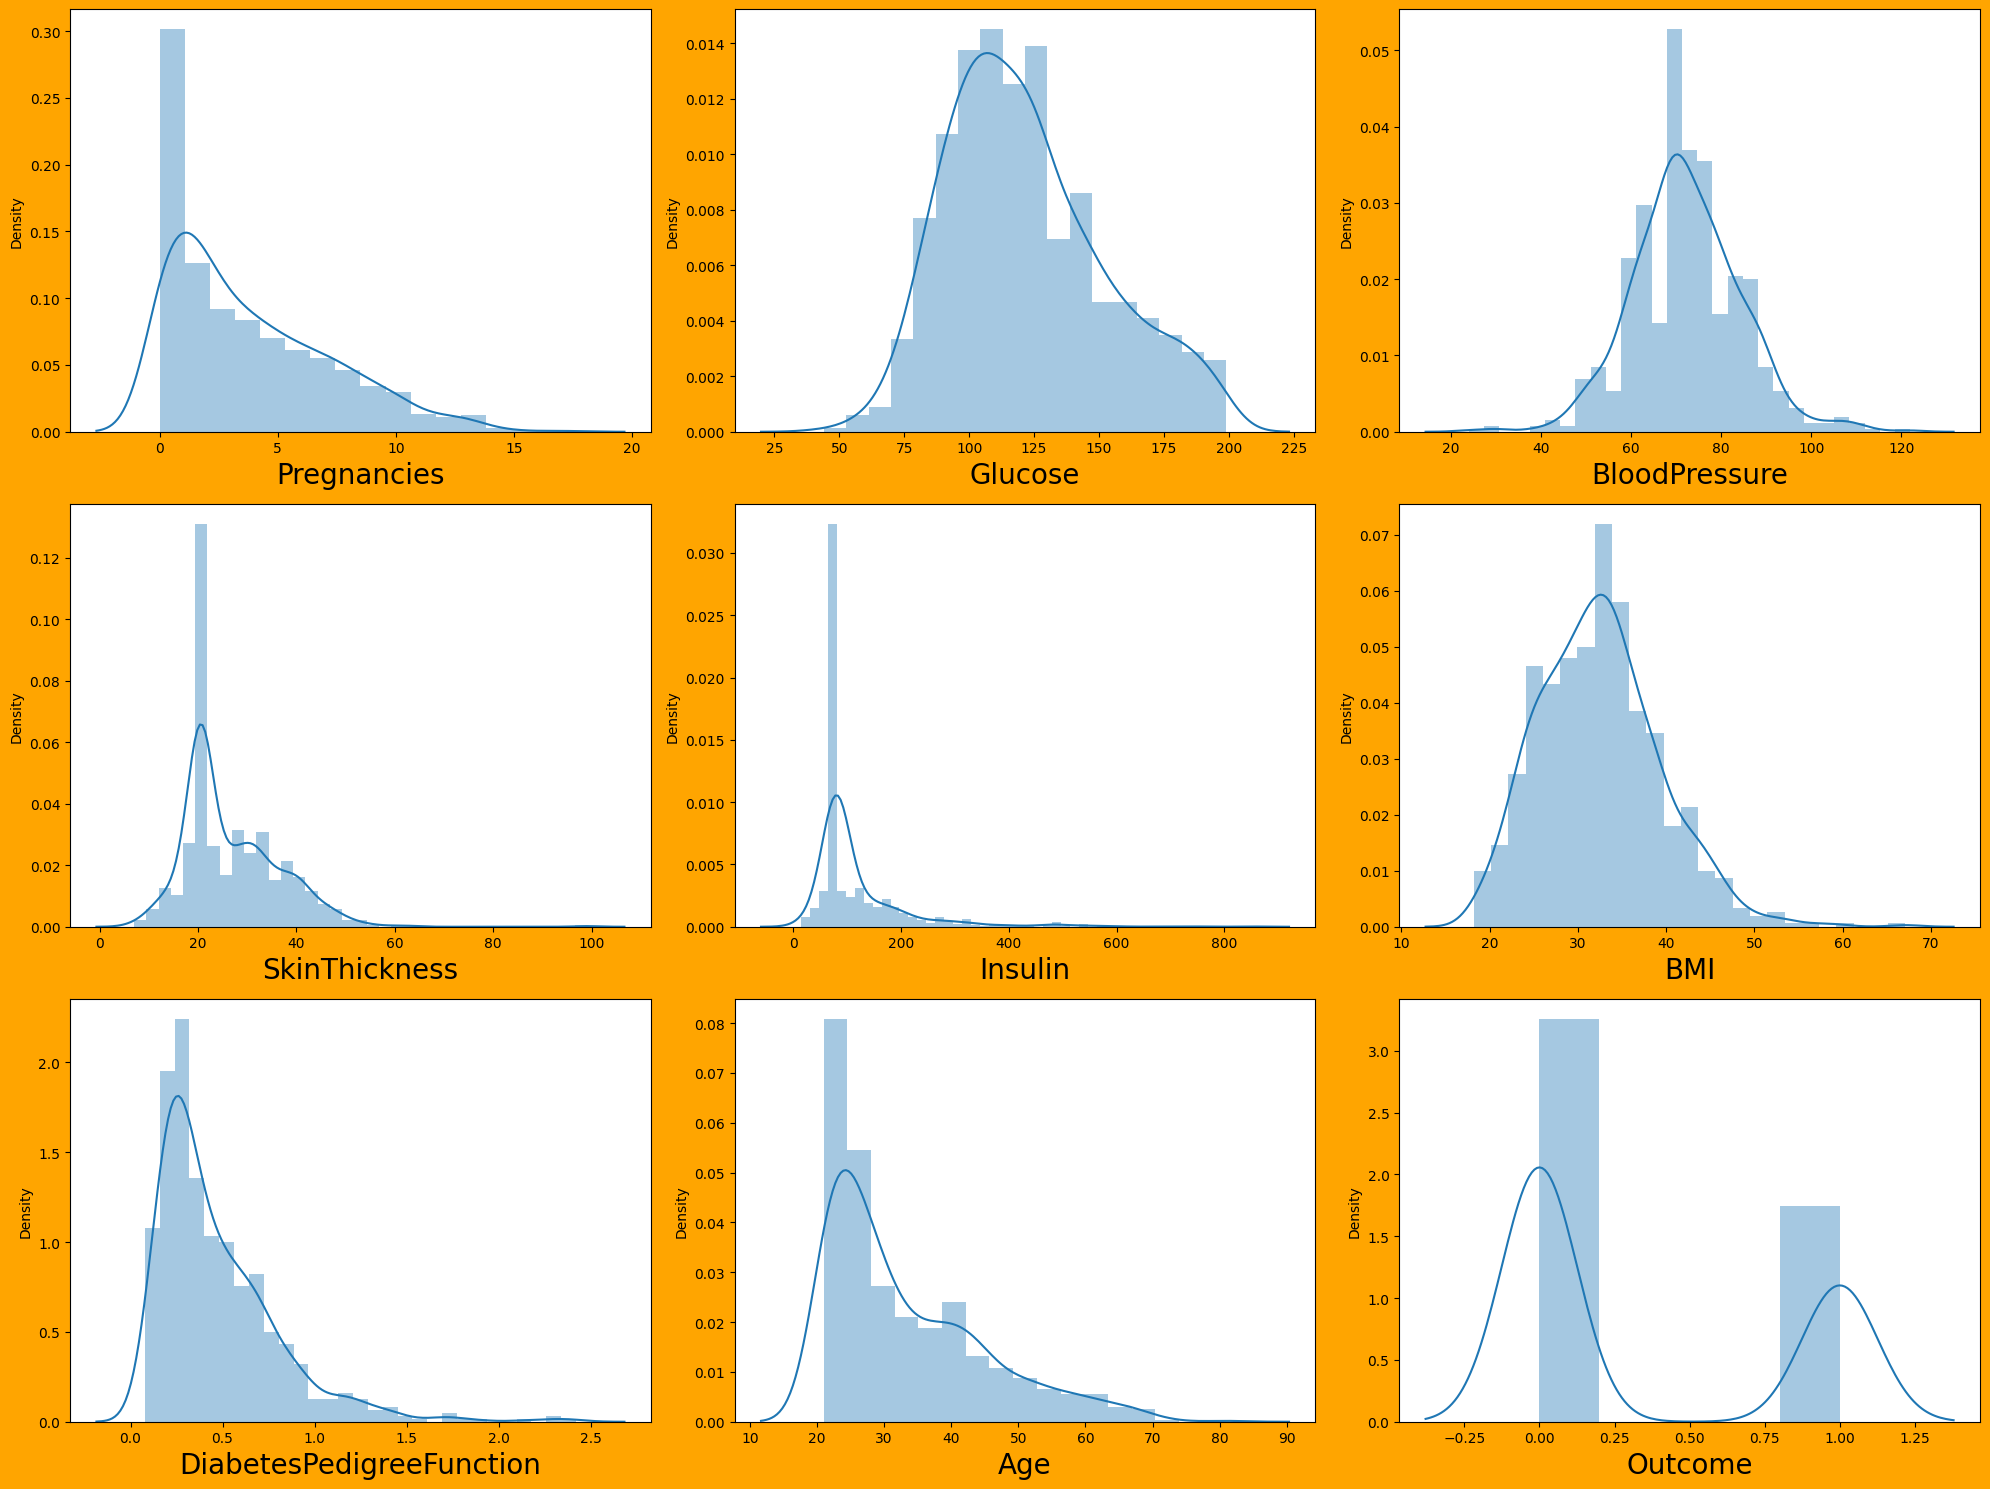

In [18]:
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [19]:
#Now its Good Looking 
#But i think there is outliers
#Lets go And Fix this also
#Lets see by Boxplot

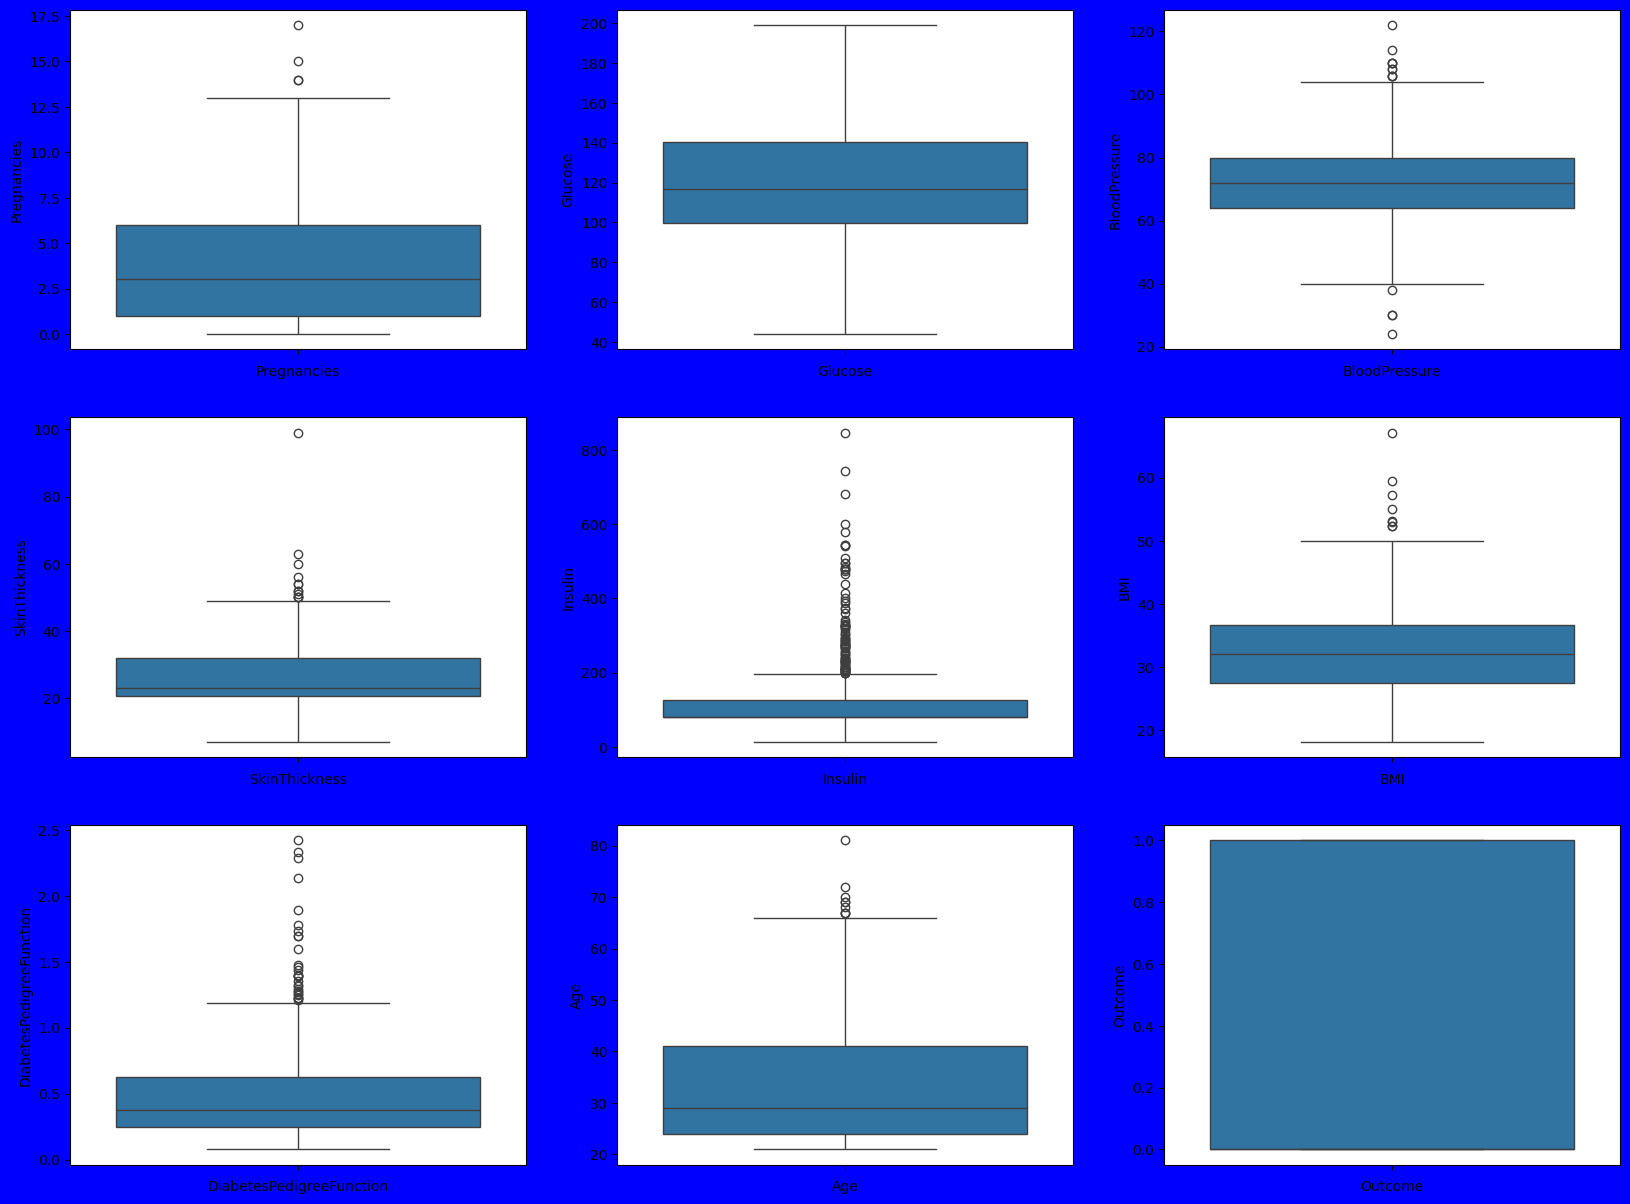

In [20]:
plt.figure(figsize=(20,15),facecolor='blue')
plotnumber=1
for column in data:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column)
    plotnumber +=1
plt.show()

In [39]:
#There are Lots of outliers
data.describe()
# we have to remove outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.764000,121.524630,71.983589,26.532840,118.916545,32.292024,0.474408,33.090667,0.344000
std,3.252857,30.307979,11.013891,9.622215,93.782043,6.679538,0.333421,11.730270,0.475358
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.250000,64.000000,20.536458,79.799479,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.375500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.750000,36.300000,0.628500,40.000000,1.000000
max,13.000000,199.000000,104.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


# Handling Outliers

In [40]:
q1 = data.quantile(0.25)

In [41]:
q3 = data.quantile(0.75)

In [42]:
iqr = q3 - q1

In [43]:
print(q1)
print(q3)
print(iqr)

Pregnancies                  1.000000
Glucose                     99.250000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.245000
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64
Pregnancies                   6.0000
Glucose                     140.0000
BloodPressure                80.0000
SkinThickness                32.0000
Insulin                     127.7500
BMI                          36.3000
DiabetesPedigreeFunction      0.6285
Age                          40.0000
Outcome                       1.0000
Name: 0.75, dtype: float64
Pregnancies                  5.000000
Glucose                     40.750000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.950521
BMI                          8.800000
DiabetesPedigreeFunction     0.383500
Age  

In [52]:
#Pregnancies
preg=q3.Pregnancies +(1.5*iqr.Pregnancies)
index=np.where(data['Pregnancies'] > preg)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(750, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
745,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
746,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
747,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
748,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [53]:
#BloodPressure
bp=q3.BloodPressure +(1.5*iqr.BloodPressure)
index=np.where(data['BloodPressure']>bp)
data=data.drop(data.index[index])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
745,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
746,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
747,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
748,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [28]:
#For lower Outliers

In [54]:
#BloodPressure
bp=q1.BloodPressure -(1.5*iqr.BloodPressure)
index=np.where(data['BloodPressure']<bp)
data=data.drop(data.index[index])
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
745,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
746,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
747,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
748,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [55]:
#For Upper Outliers

In [56]:
#SkinThickness
sk=q3.SkinThickness +(1.5 * iqr.SkinThickness)
index=np.where(data['SkinThickness']>sk)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(738, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
733,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
734,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
735,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
736,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [57]:
#Insulin
ins=iqr.Insulin + (1.5*iqr.Insulin)
index=np.where(data['Insulin']>ins)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(536, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
531,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
532,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
533,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
534,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [58]:
#BMI
bm=q3.BMI * (1.5 + iqr.BMI)
index=np.where(data['BMI']>bm)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(536, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
531,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
532,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
533,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
534,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [59]:
#DiabetesPedigreeFunction
dbs=q3.DiabetesPedigreeFunction + (1.5 *iqr.DiabetesPedigreeFunction)
index=np.where(data['DiabetesPedigreeFunction']>dbs)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

(518, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
513,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
514,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
515,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
516,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [60]:
#I think now in dataset there is no problem and we are good to go.
#Lets plot categorial plot (stripplot)
# And check the relationship

In [61]:
x=data.drop(columns=['Outcome'])
y=data.Outcome

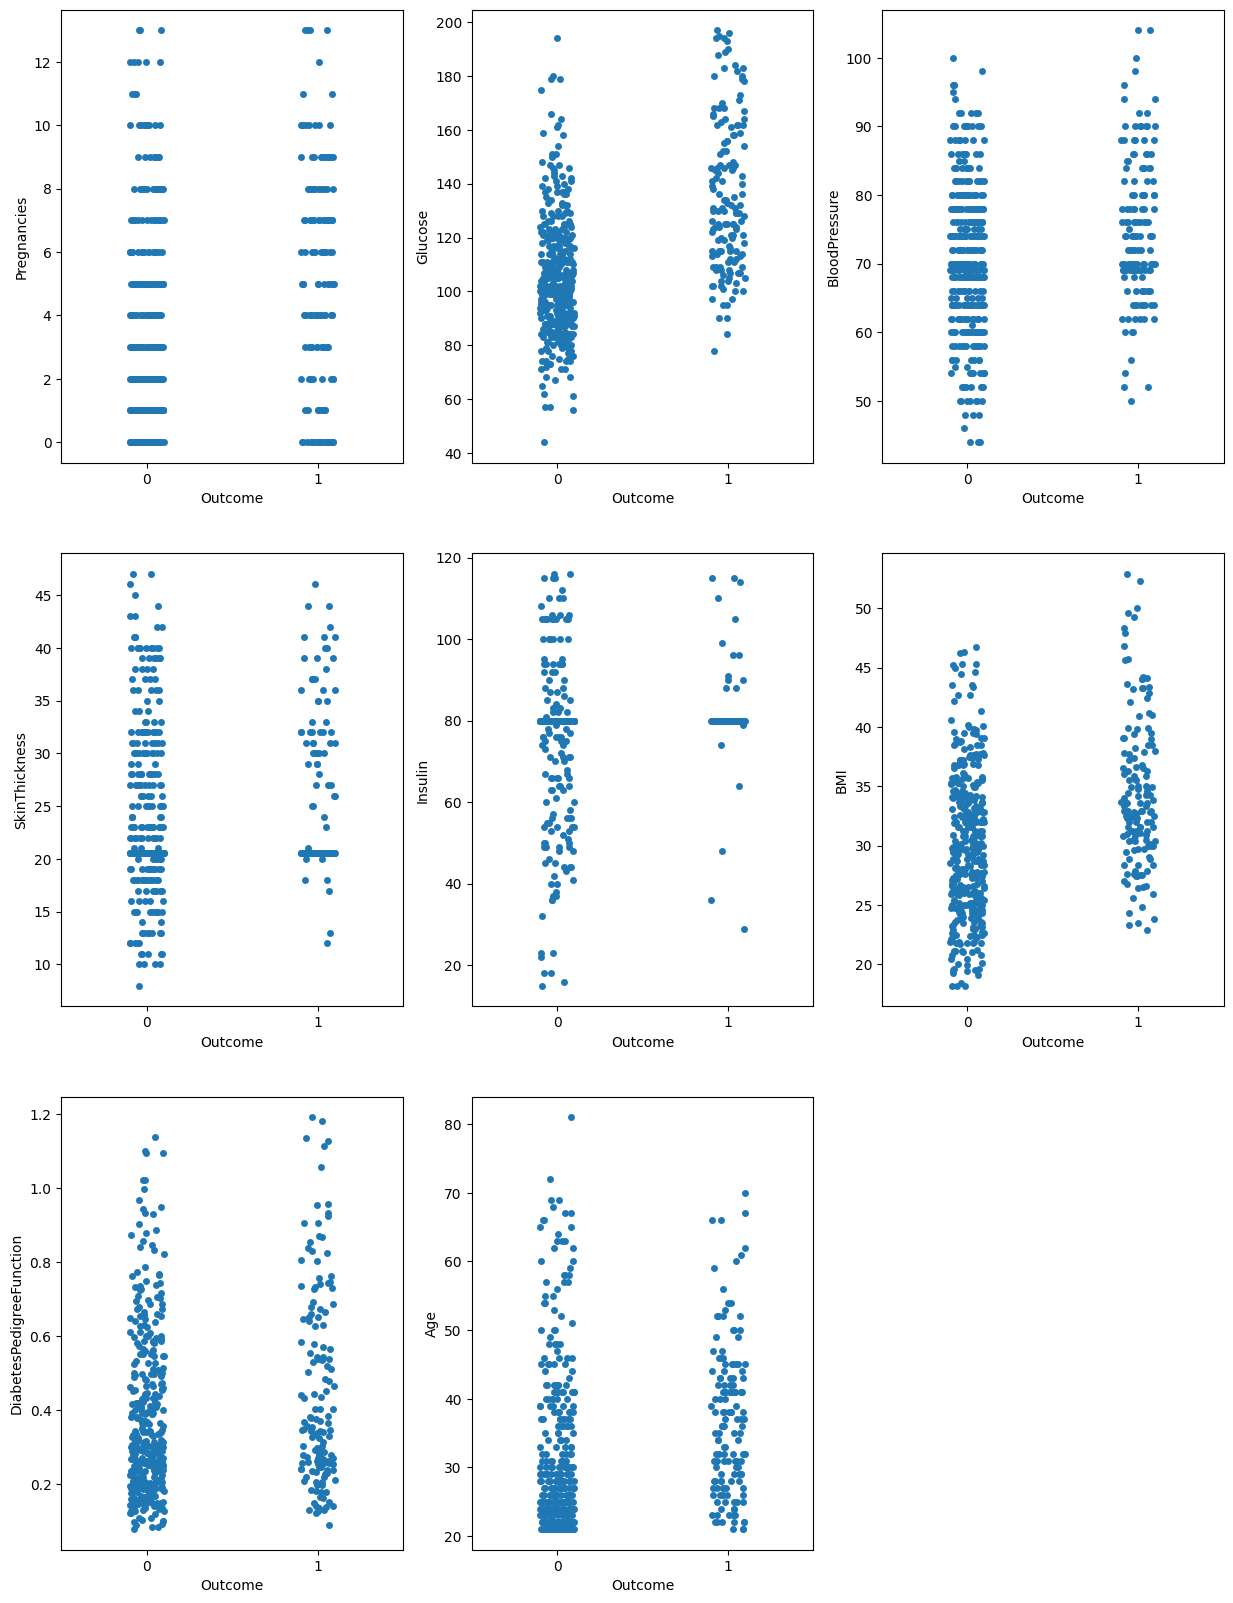

In [62]:
#Lets see how feature are related to class
plt.figure(figsize=(15,20))
plotnumber = 1
for column in x:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column])
    plotnumber +=1
plt.show()

In [63]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [69]:
x_scaled

array([[ 0.660667  ,  1.21489459,  0.01270591, ...,  0.36951254,
         0.95856707,  1.40749112],
       [-0.88088934, -1.05394332, -0.54108391, ..., -0.71217016,
        -0.20856304, -0.1731259 ],
       [ 1.27728954,  2.4753601 , -0.72568051, ..., -1.2221063 ,
         1.14886003, -0.08993553],
       ...,
       [ 0.35235574,  0.24253549,  0.01270591, ..., -0.7739806 ,
        -0.65680866, -0.25631627],
       [-0.88088934,  0.42260199, -1.09487373, ..., -0.17132881,
        -0.2170205 ,  1.15792001],
       [-0.88088934, -0.76583692, -0.1718907 , ..., -0.12497098,
        -0.3607974 , -0.83864886]])

In [65]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns

In [66]:
vif

,vif,Features
0,1.346586,Pregnancies
1,1.215331,Glucose
2,1.279985,BloodPressure
3,1.287242,SkinThickness
4,1.050519,Insulin
5,1.413239,BMI
6,1.021498,DiabetesPedigreeFunction
7,1.554914,Age


In [70]:
#Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state= 456)

# Model Instantiating and Training

In [71]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [73]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8307692307692308


# Confusion Matrix

This is used to evaluate the performance of a classification model

In [74]:
cf_metrics = confusion_matrix(y_test,y_pred)
cf_metrics

array([[87,  5],
       [17, 21]], dtype=int64)

In [78]:
#Displaying the precision, recall, f1-score

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        92
           1       0.81      0.55      0.66        38

    accuracy                           0.83       130
   macro avg       0.82      0.75      0.77       130
weighted avg       0.83      0.83      0.82       130

